In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Load the movie_metadata.csv dataset.
file_path = "movie_metadata.csv"
moviedata = pd.read_csv(file_path)
moviedata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Check columns
moviedata.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
# Check data type
moviedata.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
# select the revelant columns
moviedata_df = moviedata[["director_name", "director_facebook_likes", "num_critic_for_reviews", "cast_total_facebook_likes", "duration", "budget", "gross", "imdb_score" ]]
moviedata

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
# Remove the "genres" column. 
# moviedata_df = moviedata_df.drop(['genres'], axis=1)
# moviedata_df.head()

In [7]:
# Remove rows that have at least 1 null value.
moviedata_df = moviedata_df.dropna()
moviedata_df

,director_name,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,duration,budget,gross,imdb_score
0,James Cameron,0.0,723.0,4834,178.0,237000000.0,760505847.0,7.9
1,Gore Verbinski,563.0,302.0,48350,169.0,300000000.0,309404152.0,7.1
2,Sam Mendes,0.0,602.0,11700,148.0,245000000.0,200074175.0,6.8
3,Christopher Nolan,22000.0,813.0,106759,164.0,250000000.0,448130642.0,8.5
5,Andrew Stanton,475.0,462.0,1873,132.0,263700000.0,73058679.0,6.6
...,...,...,...,...,...,...,...,...
5033,Shane Carruth,291.0,143.0,368,77.0,7000.0,424760.0,7.0
5034,Neill Dela Llana,0.0,35.0,0,80.0,7000.0,70071.0,6.3
5035,Robert Rodriguez,0.0,56.0,147,81.0,7000.0,2040920.0,6.9
5037,Edward Burns,0.0,14.0,690,95.0,9000.0,4584.0,6.4


In [8]:
# Keep the rows where above 50 imdb_score
# moviedata_df = moviedata_df[moviedata_df['imdb_score'] > 5.0]
# moviedata_df

In [9]:
director_count = moviedata_df.director_name.value_counts()
director_count

Steven Spielberg       25
Woody Allen            19
Clint Eastwood         19
Ridley Scott           17
Tim Burton             16
                       ..
Arjun Sablok            1
Whit Stillman           1
Jonathan Caouette       1
Steven E. de Souza      1
Gary David Goldberg     1
Name: director_name, Length: 1751, dtype: int64

In [10]:
# Visualize the value counts
# budget_count.plot.density()

Some directors appear less frequently than others, we have to bucket the rare values as there are many unique values unevenly distributed

<AxesSubplot:ylabel='Density'>

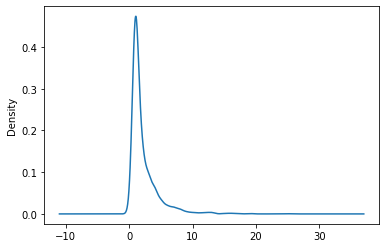

In [11]:
# Visualize the value counts
director_count.plot.density()

According to density plot, the most common unique values has more than 13 instances within the dataset

In [12]:
# Determine which values to replace
replace_directors = list(director_count[director_count < 10].index)
top_directors = list(director_count[director_count >= 10].index)

# Replace in DataFrame
for director in replace_directors:
    moviedata_df.director_name = moviedata_df.director_name.replace(director,"with_less_movies")
    #produced_less_movies are directors with less than 10 movies in this dataset
for director in top_directors:
    moviedata_df.director_name = moviedata_df.director_name.replace(director,"with_more_movies")
    #produced_more_movies are directors with more than 10 movies in the dataset

# Check to make sure binning was successful
moviedata_df.director_name.value_counts()

with_less_movies    3464
with_more_movies     425
Name: director_name, dtype: int64

In [13]:
#budget_count = moviedata_df.budget.value_counts()
#budget_count
#budget_mean = moviedata_df.budget.mean()
#budget_mean
budget_count = moviedata_df['budget'].value_counts().sort_values(ascending=False).sort_values(ascending=False)
budget_count

20000000.0    162
30000000.0    134
15000000.0    133
40000000.0    130
25000000.0    130
             ... 
18026148.0      1
9800000.0       1
5300000.0       1
950000.0        1
218.0           1
Name: budget, Length: 373, dtype: int64

In [14]:
# Determine which values to replace
high_investment = list(budget_count[budget_count >= 21].index)
low_investment = list(budget_count[budget_count < 21].index)

# Replace in DataFrame
for investment in high_investment:
    moviedata_df.budget = moviedata_df.budget.replace(investment,"high_budget")
    #movies above the budget_mean are deemed high_budget
for investment in low_investment:
    moviedata_df.budget = moviedata_df.budget.replace(investment,"low_budget")
    #movies above the budget_mean are deemed high_budget

# Check to make sure binning was successful
moviedata_df.budget.value_counts()

high_budget    2830
low_budget     1059
Name: budget, dtype: int64

In [15]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(moviedata_df.director_name.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['director_name'])
encode_df

,director_name_with_less_movies,director_name_with_more_movies
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3884,1.0,0.0
3885,1.0,0.0
3886,0.0,1.0
3887,1.0,0.0


In [16]:
# Merge the two DataFrames together and drop the director_name column
#moviedata.reset_index()
#encode_df.reset_index()
#moviedata_df =pd.concat([moviedata_df,encode_df], axis =1)
#moviedata_df = moviedata_df.drop(columns =["director_name"])
moviedata_df

,director_name,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,duration,budget,gross,imdb_score
0,with_less_movies,0.0,723.0,4834,178.0,low_budget,760505847.0,7.9
1,with_less_movies,563.0,302.0,48350,169.0,low_budget,309404152.0,7.1
2,with_less_movies,0.0,602.0,11700,148.0,low_budget,200074175.0,6.8
3,with_less_movies,22000.0,813.0,106759,164.0,low_budget,448130642.0,8.5
5,with_less_movies,475.0,462.0,1873,132.0,low_budget,73058679.0,6.6
...,...,...,...,...,...,...,...,...
5033,with_less_movies,291.0,143.0,368,77.0,low_budget,424760.0,7.0
5034,with_less_movies,0.0,35.0,0,80.0,low_budget,70071.0,6.3
5035,with_more_movies,0.0,56.0,147,81.0,low_budget,2040920.0,6.9
5037,with_less_movies,0.0,14.0,690,95.0,low_budget,4584.0,6.4


In [17]:
# Remove rows that have at least 1 null value.
moviedata_df = moviedata_df.dropna()
moviedata_df

,director_name,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,duration,budget,gross,imdb_score
0,with_less_movies,0.0,723.0,4834,178.0,low_budget,760505847.0,7.9
1,with_less_movies,563.0,302.0,48350,169.0,low_budget,309404152.0,7.1
2,with_less_movies,0.0,602.0,11700,148.0,low_budget,200074175.0,6.8
3,with_less_movies,22000.0,813.0,106759,164.0,low_budget,448130642.0,8.5
5,with_less_movies,475.0,462.0,1873,132.0,low_budget,73058679.0,6.6
...,...,...,...,...,...,...,...,...
5033,with_less_movies,291.0,143.0,368,77.0,low_budget,424760.0,7.0
5034,with_less_movies,0.0,35.0,0,80.0,low_budget,70071.0,6.3
5035,with_more_movies,0.0,56.0,147,81.0,low_budget,2040920.0,6.9
5037,with_less_movies,0.0,14.0,690,95.0,low_budget,4584.0,6.4


Since we're trying to build a binary classifier on nonlinear data, we'll use the tahn activation function using neural network model to train and identify patterns using nonlinear inputs.

In [18]:
# Generate our categorical variable list
moviedata_cat = moviedata_df.dtypes[moviedata_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
moviedata_df[moviedata_cat].nunique()

director_name    2
budget           2
dtype: int64

In [19]:
# Merge one-hot encoded features and drop the originals
moviedata_df = moviedata_df.merge(encode_df,left_index=True, right_index=True)
moviedata_df = moviedata_df.drop(moviedata_cat,1)
moviedata_df.head()

,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,duration,gross,imdb_score,director_name_with_less_movies,director_name_with_more_movies
0,0.0,723.0,4834,178.0,760505847.0,7.9,1.0,0.0
1,563.0,302.0,48350,169.0,309404152.0,7.1,1.0,0.0
2,0.0,602.0,11700,148.0,200074175.0,6.8,1.0,0.0
3,22000.0,813.0,106759,164.0,448130642.0,8.5,1.0,0.0
5,475.0,462.0,1873,132.0,73058679.0,6.6,0.0,1.0


In [20]:
# Remove director_name target from features data
y = moviedata_df.director_name_with_more_movies
X = moviedata_df.drop(columns=["director_name_with_more_movies","director_name_with_less_movies"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.888


In [22]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [23]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
78/78 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7682
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8889
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8889
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8889
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8889
Epoch 6/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8889
Epoch 7/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8889
Epoch 8/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8889
Epoch 9/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8889
Epoch 10/50
78/78 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8889
Epoch 11/50
78/78 [